In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


**Ma'lumotlarni yuklab olamiz va tahlil qilamiz:**

Train shape: (15000, 14)

Ustunlar:
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


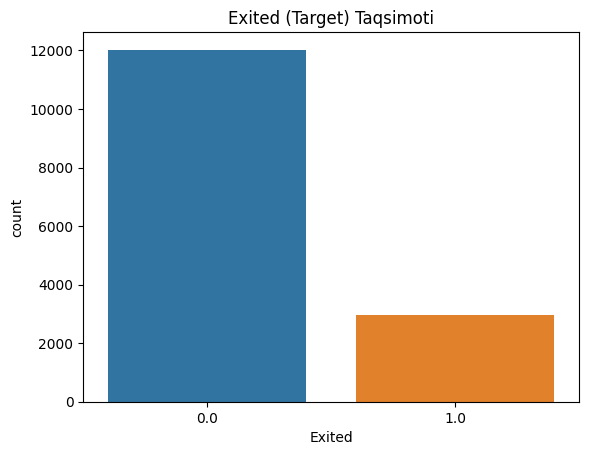

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [2]:
train = pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/train.csv')

print("Train shape:", train.shape)
print("\nUstunlar:\n", train.columns)

sns.countplot(data=train, x='Exited')
plt.title('Exited (Target) Taqsimoti')
plt.show()

train.info()

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [4]:
print(train['Geography'].value_counts())


Geography
France     9040
Spain      3280
Germany    2680
Name: count, dtype: int64


In [5]:
print("Yo'qolgan qiymatlar:\n", train.isnull().sum())

train.describe()


Yo'qolgan qiymatlar:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


**Vizual tahlil:**

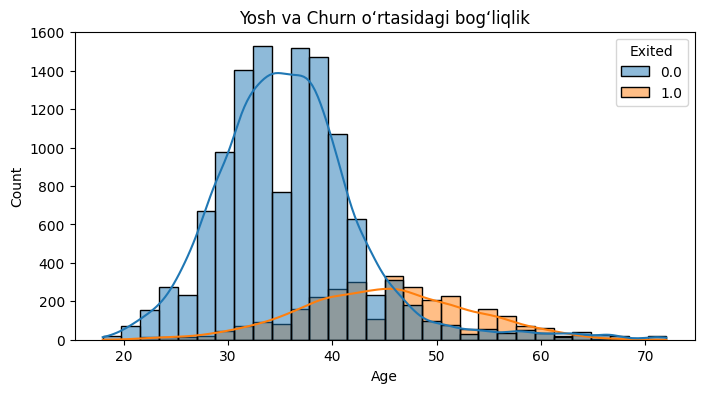

In [6]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8, 4))
sns.histplot(data=train, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Yosh va Churn o‘rtasidagi bog‘liqlik')
plt.show()


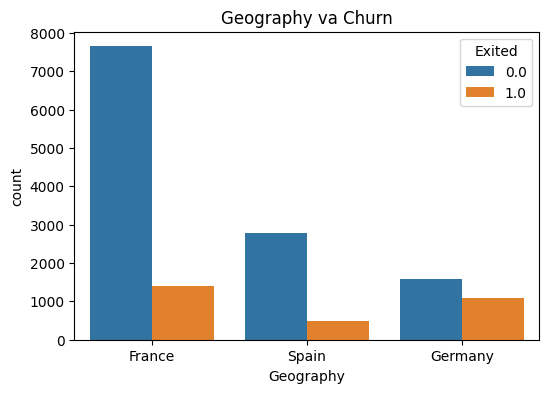

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Geography', hue='Exited')
plt.title('Geography va Churn')
plt.show()


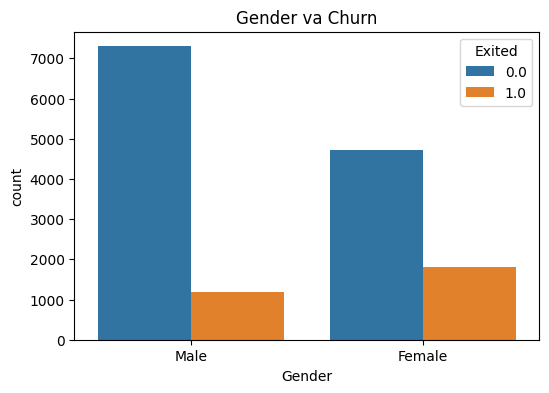

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Gender', hue='Exited')
plt.title('Gender va Churn')
plt.show()


**Korrelatsion tahlil:**

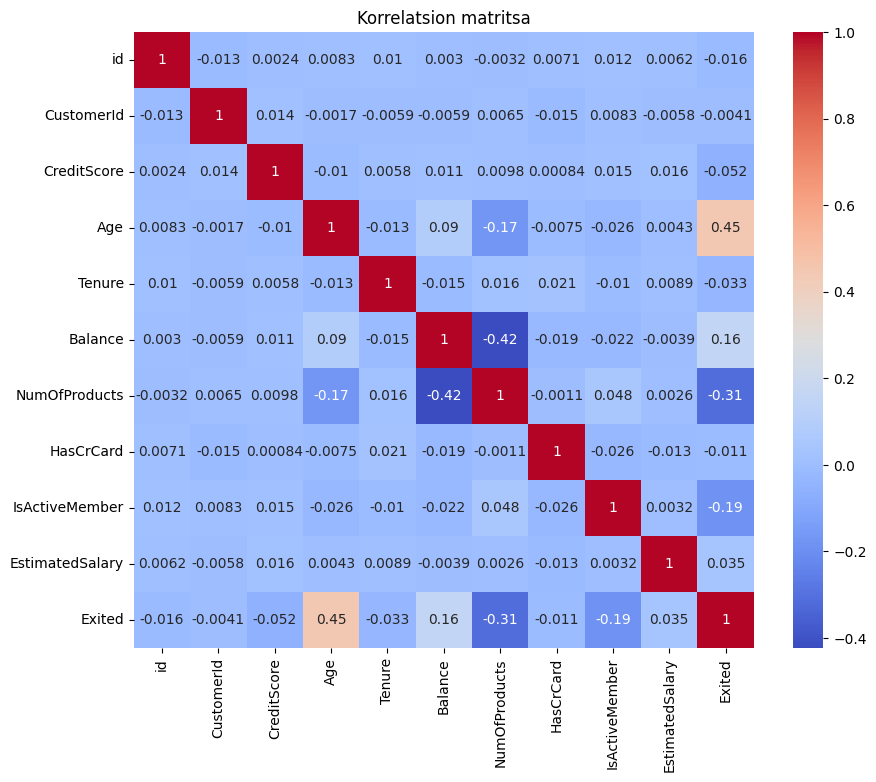

In [9]:
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelatsion matritsa')
plt.show()


In [10]:
corr_matrix = numeric_cols.corr()
exited_corr = corr_matrix['Exited'].sort_values(ascending=False)

print("Exited bilan eng bog‘liq ustunlar:\n")
print(exited_corr)


Exited bilan eng bog‘liq ustunlar:

Exited             1.000000
Age                0.449425
Balance            0.160062
EstimatedSalary    0.035193
CustomerId        -0.004122
HasCrCard         -0.010670
id                -0.015533
Tenure            -0.032897
CreditScore       -0.052375
IsActiveMember    -0.188748
NumOfProducts     -0.312812
Name: Exited, dtype: float64


**ML ga tayyorlaymiz:**

In [11]:
X = train.drop(['Exited', 'CustomerId', 'Surname'], axis=1)  
y = train['Exited'] 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

In [12]:
X = train.drop(['Exited', 'CustomerId', 'Surname'], axis=1)  
y = train['Exited'] 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_valid['Gender'] = label_encoder.transform(X_valid['Gender'])  # Valid ma'lumotlari uchun ham kodlash

X_train = pd.get_dummies(X_train, columns=['Geography'], drop_first=True)
X_valid = pd.get_dummies(X_valid, columns=['Geography'], drop_first=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)  # Valid ma'lumotlarini faqat transform qilamiz


**Regressiya modellarini sinab ko'ramiz va eng yuqori aniqlikda ishlayotganini tanlaymiz:**

Random Forest Test Accuracy: 0.8913

Confusion Matrix (Random Forest):
[[2305  119]
 [ 207  369]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2424
         1.0       0.76      0.64      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.81      3000
weighted avg       0.89      0.89      0.89      3000



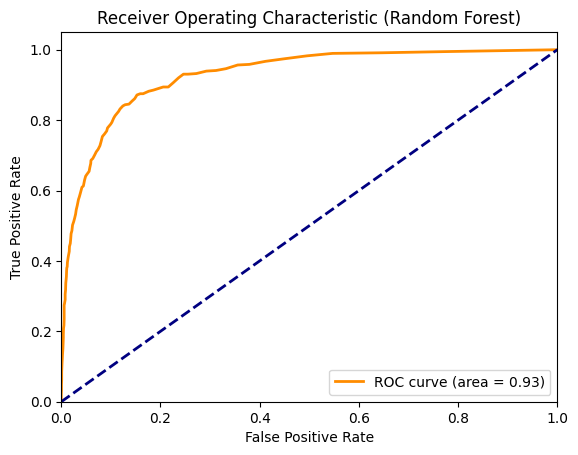

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_valid_pred_rf = rf_model.predict(X_valid_scaled)
test_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_valid, y_valid_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_valid, y_valid_pred_rf))

y_prob_rf = rf_model.predict_proba(X_valid_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


SVC Test Accuracy: 0.8930

Confusion Matrix (SVC):
[[2316  108]
 [ 213  363]]

Classification Report (SVC):
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2424
         1.0       0.77      0.63      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.79      0.81      3000
weighted avg       0.89      0.89      0.89      3000



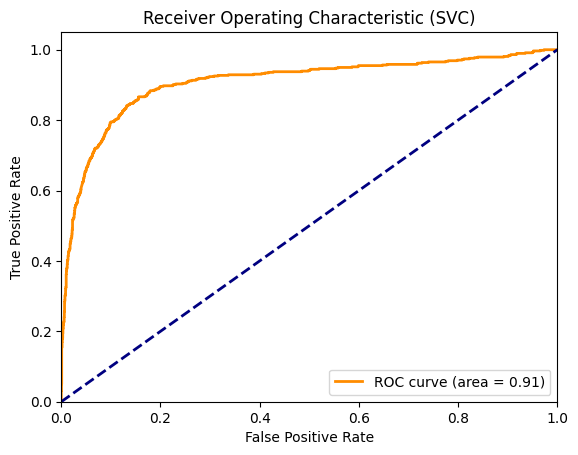

In [14]:
svc_model = SVC(probability=True, random_state=42)

svc_model.fit(X_train_scaled, y_train)

y_valid_pred_svc = svc_model.predict(X_valid_scaled)
test_accuracy_svc = accuracy_score(y_valid, y_valid_pred_svc)
print(f"SVC Test Accuracy: {test_accuracy_svc:.4f}")

print("\nConfusion Matrix (SVC):")
print(confusion_matrix(y_valid, y_valid_pred_svc))

print("\nClassification Report (SVC):")
print(classification_report(y_valid, y_valid_pred_svc))

y_prob_svc = svc_model.predict_proba(X_valid_scaled)[:, 1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_valid, y_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVC)')
plt.legend(loc="lower right")
plt.show()


Logistic Regression Test Accuracy: 0.8730

Confusion Matrix (Logistic Regression):
[[2311  113]
 [ 268  308]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2424
         1.0       0.73      0.53      0.62       576

    accuracy                           0.87      3000
   macro avg       0.81      0.74      0.77      3000
weighted avg       0.86      0.87      0.87      3000



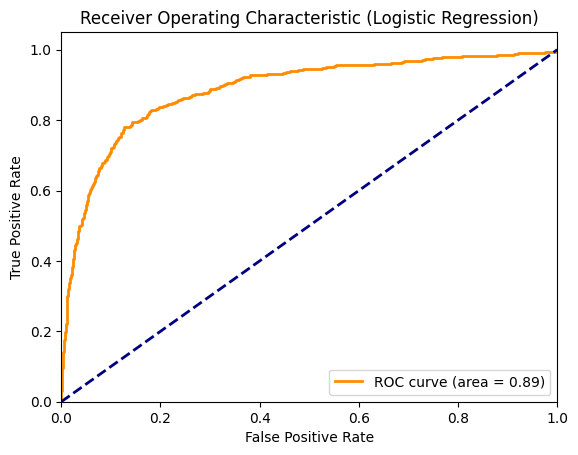

In [15]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train_scaled, y_train)

y_valid_pred_logreg = logreg_model.predict(X_valid_scaled)
test_accuracy_logreg = accuracy_score(y_valid, y_valid_pred_logreg)
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg:.4f}")

print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_valid, y_valid_pred_logreg))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_valid, y_valid_pred_logreg))

y_prob_logreg = logreg_model.predict_proba(X_valid_scaled)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_valid, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting Test Accuracy: 0.8940

Confusion Matrix (Gradient Boosting):
[[2308  116]
 [ 202  374]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2424
         1.0       0.76      0.65      0.70       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.89      0.89      0.89      3000



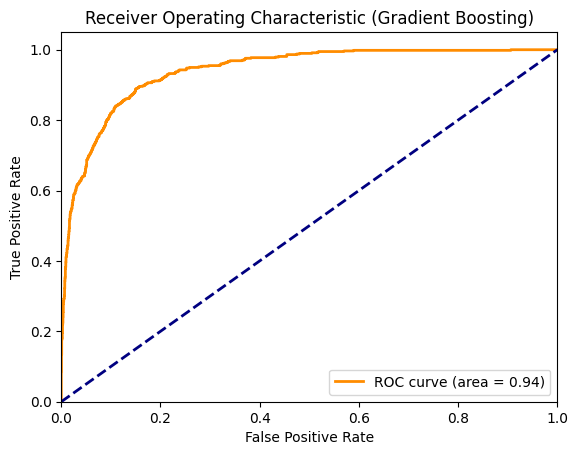

In [16]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_valid_pred_gb = gb_model.predict(X_valid_scaled)
test_accuracy_gb = accuracy_score(y_valid, y_valid_pred_gb)
print(f"Gradient Boosting Test Accuracy: {test_accuracy_gb:.4f}")

print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_valid, y_valid_pred_gb))

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_valid, y_valid_pred_gb))

y_prob_gb = gb_model.predict_proba(X_valid_scaled)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_valid, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()


KNN Test Accuracy: 0.8700

Confusion Matrix (KNN):
[[2285  139]
 [ 251  325]]

Classification Report (KNN):
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2424
         1.0       0.70      0.56      0.63       576

    accuracy                           0.87      3000
   macro avg       0.80      0.75      0.77      3000
weighted avg       0.86      0.87      0.86      3000



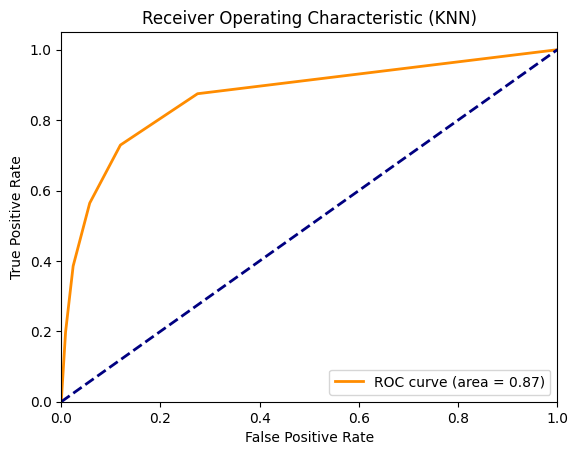

In [17]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train_scaled, y_train)

y_valid_pred_knn = knn_model.predict(X_valid_scaled)
test_accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}")

print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_valid, y_valid_pred_knn))

print("\nClassification Report (KNN):")
print(classification_report(y_valid, y_valid_pred_knn))

y_prob_knn = knn_model.predict_proba(X_valid_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_valid, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()


**Optimal thresholdni aniqlab olamiz:**

In [18]:

y_prob_gb = gb_model.predict_proba(X_valid_scaled)[:, 1]

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_valid, y_prob_gb)

# FPR va TPR o'rtasidagi farqni maksimal qilish orqali optimal thresholdni aniqlash
optimal_idx = np.argmax(tpr_gb - fpr_gb)
optimal_threshold = thresholds_gb[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.18747316434932323


**Tanlangan regressiya modeli xulosasi:**

Mening fikrimcha, Gradient Boosting (GB) modeli tanlanishim afzal. Sababi, uning test aniqligi eng yuqori (0.8940) bo'lib, bu model boshqa modellarga nisbatan yaxshiroq ishlamoqda. Boshqa modellarga, masalan, Random Forest (0.8913), SVC (0.8930), Logistic Regression (0.8730) va KNN (0.8700), qaraganda, Gradient Boosting modeli bir nechta statistikalar bo'yicha eng yaxshi natijalar ko'rsatdi.

Shuningdek, Gradient Boosting modeli churn muammosini bashorat qilishda aniq va muvozanatli yondashuvni taqdim etadi, chunki uning precision va recall ko'rsatkichlari yaxshi, ayniqsa churn (1.0) sinfi uchun.

In [19]:
test = pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/test.csv')

X_test = test.drop(['CustomerId', 'Surname'], axis=1)


X_test['Gender'] = label_encoder.transform(X_test['Gender'])


X_test = pd.get_dummies(X_test, columns=['Geography'], drop_first=True)

X_test_scaled = scaler.transform(X_test)

y_prob_test = gb_model.predict_proba(X_test_scaled)[:, 1]

y_pred_class_test = (y_prob_test >= 0.1874).astype(int)  

output = pd.DataFrame({
    'Id': test['CustomerId'],
    'PredictedExitedProb': y_prob_test,  
    'PredictedExitedClass': y_pred_class_test  
})

output.to_csv('predictions.csv', index=False)



**Bashorat qilingan ma'lumotlarni vizual tahlili:**

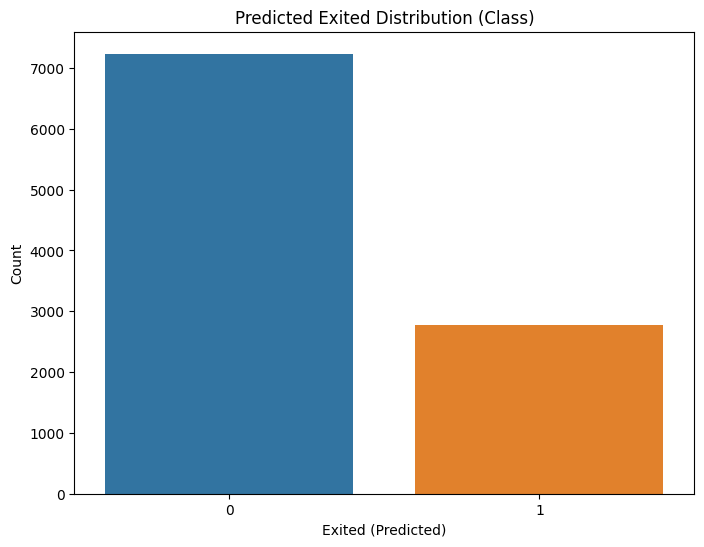

In [20]:
predictions = pd.read_csv('predictions.csv')

plt.figure(figsize=(8, 6))
sns.countplot(x='PredictedExitedClass', data=predictions)
plt.title('Predicted Exited Distribution (Class)')
plt.xlabel('Exited (Predicted)')
plt.ylabel('Count')
plt.show()